In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FinalDataset - Copy - FinalDataset - Copy.csv to FinalDataset - Copy - FinalDataset - Copy.csv


In [3]:
df = pd.read_csv('FinalDataset - Copy - FinalDataset - Copy.csv')

In [4]:
df

,Date,Rainfall,Humidity,Cloud,Dry_bulb,Min_Temp,Max_Temp,Pressure,Sun Shine,Wind_Speed,Wind_Direction_Start
0,1/1/1995,0,69,0,19.2,9.9,26.0,1015.2,6.3,0.0,-1
1,2/1/1995,0,70,0,15.5,11.5,24.0,1015.2,8.3,0.0,-1
2,3/1/1995,0,71,0,14.2,6.0,23.5,1016.1,8.5,0.0,-1
3,4/1/1995,0,72,0,15.0,6.4,25.0,1016.8,8.7,0.0,-1
4,5/1/1995,0,75,0,16.1,7.0,25.5,1018.0,8.8,6.0,327
...,...,...,...,...,...,...,...,...,...,...,...
9492,27/12/2020,0,72,0,18.3,11.5,25.6,1012.9,8.1,0.0,-1
9493,28/12/2020,0,81,0,17.5,11.0,26.0,1012.9,7.4,2.0,327
9494,29/12/2020,0,78,0,17.6,10.5,25.5,1013.7,8.1,2.0,305
9495,30/12/2020,0,77,0,17.4,10.9,25.5,1014.2,8.6,0.0,-1


Text(0.5, 0, 'parameters')

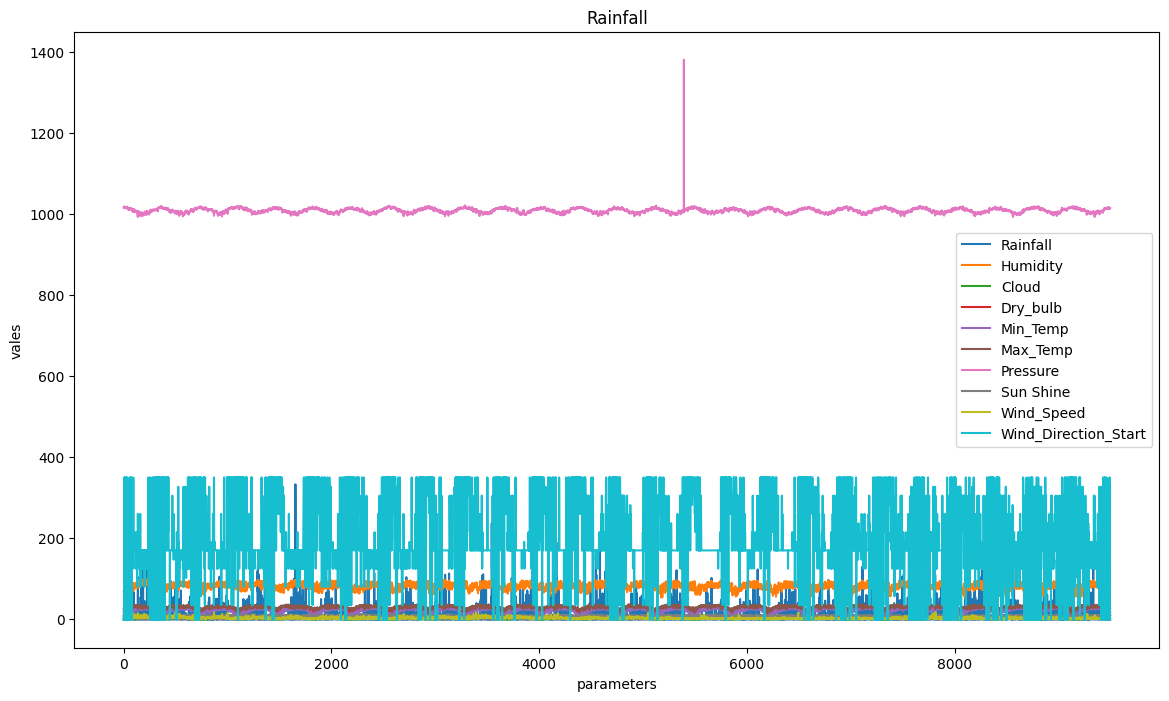

In [5]:
df.plot(kind='line',figsize=(14,8))
plt.title('Rainfall')
plt.ylabel('vales')
plt.xlabel('parameters')

In [6]:
train_dates=pd.to_datetime(df['Date'])

<ipython-input-6-2c65ab284488>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_dates=pd.to_datetime(df['Date'])


In [7]:
train_dates

0      1995-01-01
1      1995-02-01
2      1995-03-01
3      1995-04-01
4      1995-05-01
          ...    
9492   2020-12-27
9493   2020-12-28
9494   2020-12-29
9495   2020-12-30
9496   2020-12-31
Name: Date, Length: 9497, dtype: datetime64[ns]

In [8]:
cols=list(df)[1:2]
print(cols)

['Rainfall']


<Axes: >

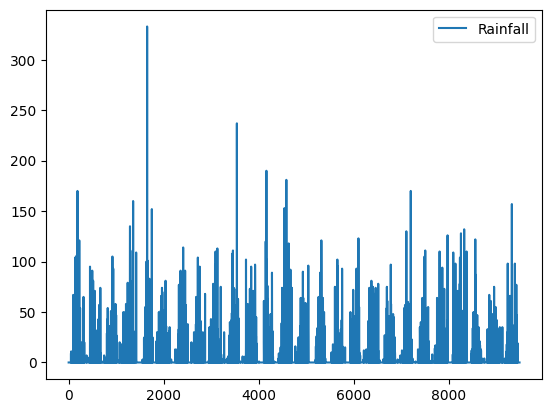

In [9]:
training_df=df[cols].astype(float)
plot_df=training_df
plot_df.plot.line()

In [10]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar=scalar.fit(training_df)
training_df_scaled=scalar.transform(training_df)

In [11]:
#Lists for storing the training data considering multiple variables
#trainX for storing training data (temperature,wind speed,relative humidity)
#trainY for storing target values(rainfall)
trainX=[]
trainY=[]

n_past=20#20 values will be considered to predict the next values
n_fut=100#for predicting the next 100 value based on previous 20 values


#Adding the values to trainX and trainY lists
for i in range(n_past,len(training_df_scaled)-n_fut+1):
    trainX.append(training_df_scaled[i-n_past:i,0:training_df_scaled.shape[1]])
    trainY.append(training_df_scaled[i+n_fut-1:i+n_fut,0])

#Converting into numpy arrays
trainX,trainY=np.array(trainX),np.array(trainY)

print('trainX shape == {}'.format(trainX.shape))#Knowing the shape
#(364,20,4) means there are 364windows(groups) of 20*4


print('trainY shape == {}'.format(trainY.shape))
#There are 364 values from previous values

trainX shape == (9378, 20, 1)
trainY shape == (9378, 1)


In [12]:
model=Sequential()
model.add(LSTM(32,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32,activation='relu',return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 32)            4352      
                                                                 
 dropout (Dropout)           (None, 20, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 32)            8320      
                                                                 
 dropout_1 (Dropout)         (None, 20, 32)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [13]:
history=model.fit(trainX,trainY,epochs=30,batch_size=5,validation_split=0.2,verbose=1)

Epoch 1/30
1501/1501 [==============================] - 40s 23ms/step - loss: 1.0260 - val_loss: 0.9441
Epoch 2/30
1501/1501 [==============================] - 34s 23ms/step - loss: 1.0228 - val_loss: 0.9427
Epoch 3/30
1501/1501 [==============================] - 34s 22ms/step - loss: 1.0233 - val_loss: 0.9474
Epoch 4/30
1501/1501 [==============================] - 34s 23ms/step - loss: 1.0223 - val_loss: 0.9479
Epoch 5/30
1501/1501 [==============================] - 34s 23ms/step - loss: 1.0213 - val_loss: 0.9379
Epoch 6/30
1501/1501 [==============================] - 34s 23ms/step - loss: 1.0186 - val_loss: 0.9402
Epoch 7/30
1501/1501 [==============================] - 34s 23ms/step - loss: 1.0176 - val_loss: 0.9375
Epoch 8/30
1501/1501 [==============================] - 37s 25ms/step - loss: 1.0180 - val_loss: 0.9361
Epoch 9/30
1501/1501 [==============================] - 34s 22ms/step - loss: 1.0172 - val_loss: 0.9491
Epoch 10/30
1501/1501 [==============================] - 39s 26m

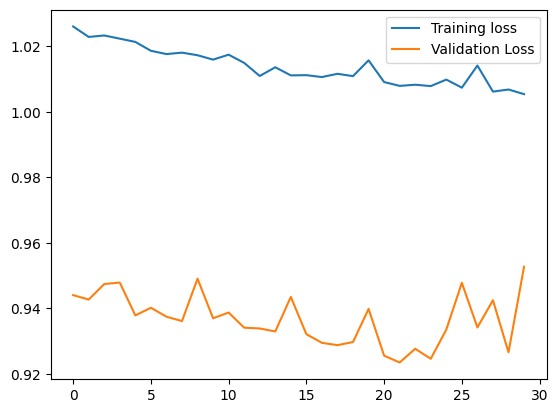

In [14]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

In [15]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_past = 1
n_days_for_prediction=100

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()

# make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 1 variables for transform, the inverse expects same dimensions
prediction_copies = np.repeat(prediction, training_df.shape[1], axis=-1)

y_pred_future = scalar.inverse_transform(prediction_copies)[:,0]

# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'precipitation':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

4/4 [==============================] - 1s 7ms/step


<ipython-input-27-022a3e3ac9a7>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  original['Date'] = pd.to_datetime(original['Date'])
<ipython-input-27-022a3e3ac9a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date'] = pd.to_datetime(original['Date'])


int64
[  0   1  11  13  10  35  27   9  15  18  40   8   4   5  17   2  22   6
  64   3  44  42  14   7  48  41  21  38  24  30 105  12  43  83 103  59
  34 111  20  31  28  16  29  19  54  26  33  52  55  53  85 110  50  36
  46  94  39  23  37  73 126 109  98  69  25  67  71  47  32  61  78 104
  81  62 128  51  88 132  45 122  87  49  58  75  60  66 157  77]
float32
[6.9565525 6.5942492 9.77612   9.870788  6.151023  9.873241  9.150372
 8.244741  3.8159301 3.4485128 5.70782   2.8076663 5.1927805 2.5167756
 2.528462  2.7947154 4.5101714 2.750971  2.6492336 4.605134  2.684841
 2.1930757 2.1084812 2.0728548 2.1186433 2.0212436 2.007142  2.059758
 2.2040136 2.2248642 2.299235  2.3251956 2.4100442 2.467555  3.1386666
 3.1399825 3.3206184 3.2979176 2.7198873 2.4160516 2.1844673 1.8976895
 1.6714705 1.5783724 1.5492457 1.576609  1.7272333 1.7723964 1.7311066
 1.7373322 1.7911032 1.6379684 1.7395953 1.9021443 1.928692  2.0537002
 2.0770502 2.8122792 2.9018004 3.903089  7.9524674 6.3538313 3.

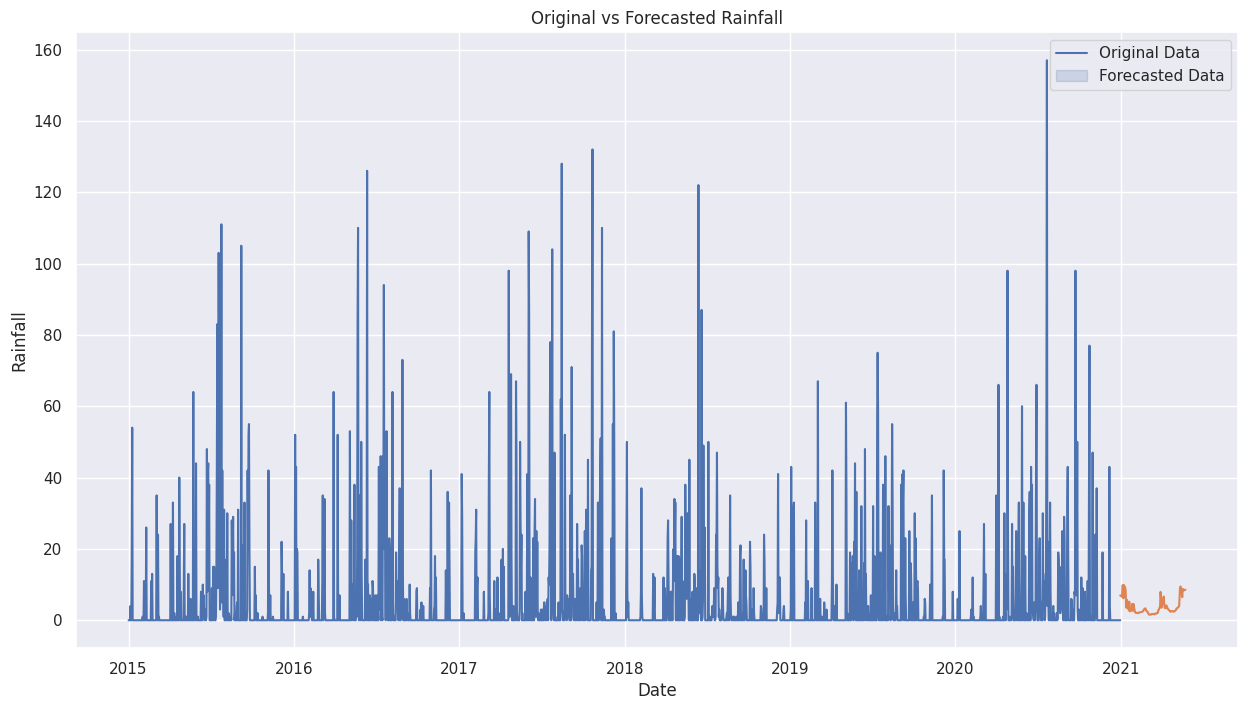

In [27]:
import seaborn as sns

original = df[['Date', 'Rainfall']]
original['Date'] = pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2015-01-01']

# Check the data types and values in 'Rainfall' column of the original DataFrame
print(original['Rainfall'].dtype)
print(original['Rainfall'].unique())

sns.set(rc={'figure.figsize': (15, 8)})
sns.lineplot(x='Date', y='Rainfall', data=original)

# Check the data types and values in 'Rainfall' column of the df_forecast DataFrame
print(df_forecast['precipitation'].dtype)
print(df_forecast['precipitation'].unique())

sns.lineplot(x='Date', y='precipitation', data=df_forecast)

# Adding labels and title
plt.title('Original vs Forecasted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.legend(['Original Data', 'Forecasted Data'])

# Show the plot
plt.show()

In [35]:
model.compile(optimizer='adam', loss='mse')

In [36]:
print("Model Evaluation Loss: {:.4f}".format(eval_result))

Model Evaluation Loss: 0.9837
